In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt


2023-12-19 20:56:52.530779: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 20:56:53.142033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 20:56:53.142111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 20:56:53.211976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 20:56:53.443110: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 20:56:53.448088: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [16]:
classes=['california_poppy',
 'water_lily',
 'astilbe',
 'iris',
 'coreopsis',
 'tulip',
 'black_eyed_susan',
 'daffodil',
 'calendula',
 'common_daisy',
 'magnolia',
 'sunflower',
 'rose',
 'carnation',
 'dandelion',
 'bellflower']

flowers_path='./flowers/flowers'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,
    subset="validation",         
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode="categorical",
    class_names=classes
)


# Define your preprocessing function
def preprocess_image(image, label):
    image = preprocess_input(image)
    return image, label

# train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


In [4]:
model = keras.models.load_model('./models/xception_v2_07_0.813.h5')


In [5]:
import scipy
from keras.preprocessing.image import ImageDataGenerator


# Overall metrics

In [6]:
model.evaluate(val_ds)

99/99 [==============================] - 91s 903ms/step - loss: 1.0496 - accuracy: 0.8129


[1.0496368408203125, 0.8128970861434937]

# Lets get closer and see prediction for a batch


1/1 [==============================] - 0s 109ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 81ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 72ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 86ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 84ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 84ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 85ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 75ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 98ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 68ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 108ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 66ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 73ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 257ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 84ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


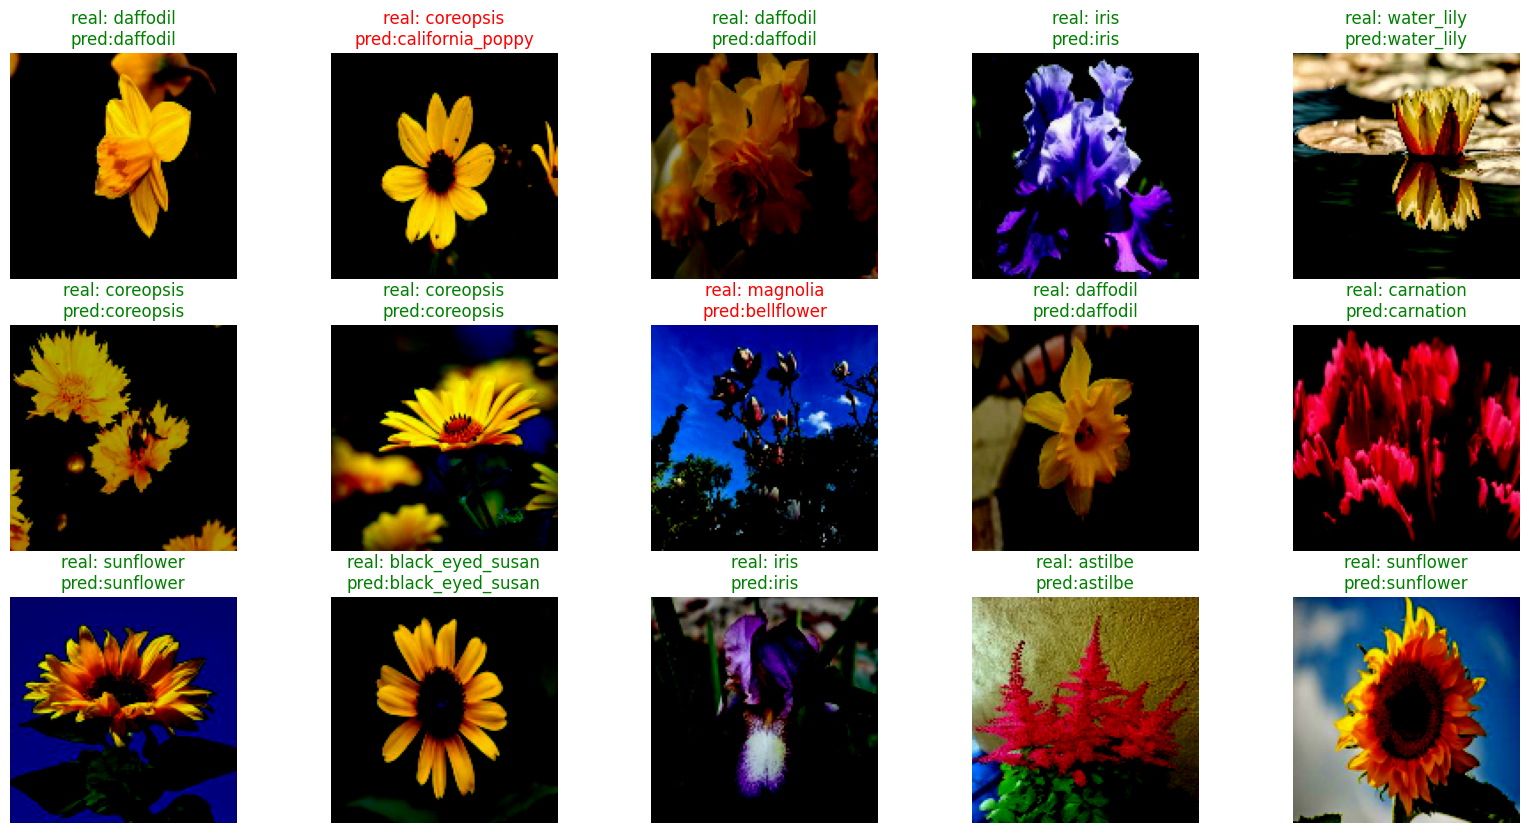

In [17]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("float")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")

## Great, almost everything correct. Now, lets classify some new unseen image of a flower

In [28]:
path = './test-images/Dandelion_2.jpg'
img = load_img(path, target_size=(128, 128))



In [29]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 128, 128, 3)

In [30]:
X = preprocess_input(X)
pred = model.predict(X)
pred


1/1 [==============================] - 0s 56ms/step


array([[0.0000000e+00, 4.3847098e-36, 2.4587226e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.1277343e-29, 1.3254302e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.3550408e-35, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [31]:
dict(zip(classes, [1.6242753180457249e-37,
 9.248677667777051e-28,
 1.7115409696562886e-25,
 1.88079096131566e-37,
 0.0,
 0.0,
 0.0,
 1.1754943508222875e-38,
 7.717252902082164e-27,
 4.166231226334089e-18,
 4.752533064329315e-30,
 0.0,
 0.0,
 2.8668280118714933e-25,
 1.0,
 1.5015102500792792e-37]))


{'california_poppy': 1.6242753180457249e-37,
 'water_lily': 9.248677667777051e-28,
 'astilbe': 1.7115409696562886e-25,
 'iris': 1.88079096131566e-37,
 'coreopsis': 0.0,
 'tulip': 0.0,
 'black_eyed_susan': 0.0,
 'daffodil': 1.1754943508222875e-38,
 'calendula': 7.717252902082164e-27,
 'common_daisy': 4.166231226334089e-18,
 'magnolia': 4.752533064329315e-30,
 'sunflower': 0.0,
 'rose': 0.0,
 'carnation': 2.8668280118714933e-25,
 'dandelion': 1.0,
 'bellflower': 1.5015102500792792e-37}

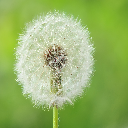

In [32]:
# indeed, its's a dandelion
img
